In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
movies_data = pd.read_csv('/Users/splik/Desktop/Projects/Netflix Movie Recommendation Engine/movies-data/movies.csv')
movie_titles = movies_data.title.tolist()

In [3]:
ratings_data = pd.read_csv('/Users/splik/Desktop/Projects/Netflix Movie Recommendation Engine/movies-data/ratings.csv')

In [4]:
tags_data = pd.read_csv('/Users/splik/Desktop/Projects/Netflix Movie Recommendation Engine/movies-data/tags.csv')

In [5]:
movies_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [7]:
tags_data.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


In [8]:
df = movies_data.join(ratings_data, on=['movieId'], rsuffix='_r').join(tags_data, on=['movieId'], rsuffix='_t')
del df['movieId_r']
del df['userId_t']
del df['movieId_t']
del df['timestamp_t']

In [9]:
df.head()

,movieId,title,genres,userId,rating,timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,3.0,1.260759e+09,dentist
1,2,Jumanji (1995),Adventure|Children|Fantasy,1.0,3.0,1.260759e+09,Cambodia
2,3,Grumpier Old Men (1995),Comedy|Romance,1.0,2.0,1.260759e+09,Russian
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1.0,4.0,1.260759e+09,forgettable
4,5,Father of the Bride Part II (1995),Comedy,1.0,2.0,1.260759e+09,short


In [10]:
rp = df.pivot_table(columns=['movieId'],index=['userId'],values='rating')

In [11]:
rp.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,99741,99764,99795,99811,99813,99839,99846,99912,99917,99992
userId,,,,,,,,,,,,,,,,,,,,,
1.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,3.5,2.0,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
rp = rp.fillna(0);

In [13]:
rp.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,99741,99764,99795,99811,99813,99839,99846,99912,99917,99992
userId,,,,,,,,,,,,,,,,,,,,,
1.0,3.0,3.0,2.0,4.0,2.0,2.0,2.0,3.5,2.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
Q = rp.values

In [15]:
Q

array([[ 3.,  3.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  5.,  3.,  4.]])

In [16]:
Q.shape

(417, 8256)

In [17]:
W = Q>0.5
W[W == True] = 1
W[W == False] = 0
W = W.astype(np.float64, copy=False)

In [18]:
W

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

In [19]:
lambda_ = 0.1
n_factors = 100
m, n = Q.shape
n_iterations = 20

In [20]:
X = 5 * np.random.rand(m, n_factors) 
Y = 5 * np.random.rand(n_factors, n)

In [21]:
def get_error(Q, X, Y, W):
    return np.sum((W * (Q - np.dot(X, Y)))**2)

In [22]:
errors = []
for ii in range(n_iterations):
    X = np.linalg.solve(np.dot(Y, Y.T) + lambda_ * np.eye(n_factors), 
                        np.dot(Y, Q.T)).T
    Y = np.linalg.solve(np.dot(X.T, X) + lambda_ * np.eye(n_factors),
                        np.dot(X.T, Q))
    if ii % 100 == 0:
        print('{}th iteration is completed'.format(ii))
    errors.append(get_error(Q, X, Y, W))
Q_hat = np.dot(X, Y)
print('Error of rated movies: {}'.format(get_error(Q, X, Y, W)))

0th iteration is completed
Error of rated movies: 18893.67603698626


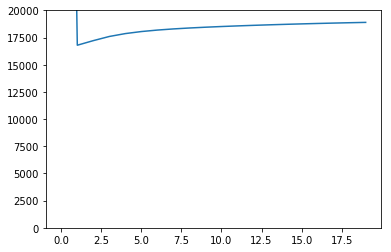

In [23]:
plt.plot(errors);
plt.ylim([0, 20000]);

In [24]:
def print_recommendations(W=W, Q=Q, Q_hat=Q_hat, movie_titles=movie_titles):
    Q_hat -= np.min(Q_hat)
    Q_hat *= float(5) / np.max(Q_hat)
    movie_ids = np.argmax(Q_hat - 5 * W, axis=1)
    for jj, movie_id in zip(range(m), movie_ids):
        print('User {} liked {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq > 3])))
        print('User {} did not like {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq < 3 and qq != 0])))
        print('\n User {} recommended movie is {} - with predicted rating: {}'.format(
                    jj + 1, movie_titles[movie_id], Q_hat[jj, movie_id]))
        print('\n' + 100 *  '-' + '\n')

In [25]:
weighted_errors = []
for ii in range(n_iterations):
    for u, Wu in enumerate(W):
        X[u] = np.linalg.solve(np.dot(Y, np.dot(np.diag(Wu), Y.T)) + lambda_ * np.eye(n_factors),
                               np.dot(Y, np.dot(np.diag(Wu), Q[u].T))).T
    for i, Wi in enumerate(W.T):
        Y[:,i] = np.linalg.solve(np.dot(X.T, np.dot(np.diag(Wi), X)) + lambda_ * np.eye(n_factors),
                                 np.dot(X.T, np.dot(np.diag(Wi), Q[:, i])))
    weighted_errors.append(get_error(Q, X, Y, W))
    print('{}th iteration is completed'.format(ii))
weighted_Q_hat = np.dot(X,Y)

0th iteration is completed
1th iteration is completed
2th iteration is completed
3th iteration is completed
4th iteration is completed
5th iteration is completed
6th iteration is completed
7th iteration is completed
8th iteration is completed
9th iteration is completed
10th iteration is completed
11th iteration is completed
12th iteration is completed
13th iteration is completed
14th iteration is completed
15th iteration is completed
16th iteration is completed
17th iteration is completed
18th iteration is completed
19th iteration is completed


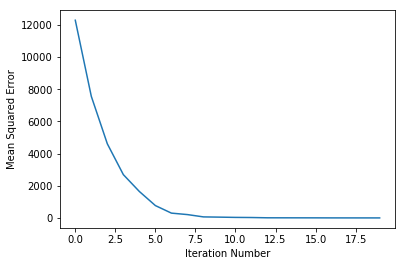

In [26]:
plt.plot(weighted_errors);
plt.xlabel('Iteration Number');
plt.ylabel('Mean Squared Error');

In [27]:
print_recommendations(Q_hat=weighted_Q_hat)

User 1 liked Waiting to Exhale (1995), Tom and Huck (1995), Dracula: Dead and Loving It (1995), Balto (1995)

User 1 did not like Grumpier Old Men (1995), Father of the Bride Part II (1995), Heat (1995), Sabrina (1995), Sudden Death (1995), GoldenEye (1995), American President, The (1995), Cutthroat Island (1995), Casino (1995), Sense and Sensibility (1995), Four Rooms (1995)


 User 1 recommended movie is American Teen (2008) - with predicted rating: 3.4090281130957947

----------------------------------------------------------------------------------------------------

User 2 liked Money Train (1995), Get Shorty (1995), Copycat (1995), Assassins (1995), Powder (1995), Now and Then (1995), City of Lost Children, The (Cité des enfants perdus, La) (1995), Shanghai Triad (Yao a yao yao dao waipo qiao) (1995), Across the Sea of Time (1995), Dead Presidents (1995), Restoration (1995), Mortal Kombat (1995), To Die For (1995), Seven (a.k.a. Se7en) (1995), When Night Is Falling (1995), Georgi


----------------------------------------------------------------------------------------------------

User 9 liked Angus (1995), Faces (1968), Quest, The (1996), Cosi (1996), Mulholland Falls (1996), Truth About Cats & Dogs, The (1996), Oliver & Company (1988), Celtic Pride (1996), Dead Man (1995), Horseman on the Roof, The (Hussard sur le toit, Le) (1995), Visitors, The (Visiteurs, Les) (1993), Multiplicity (1996), Wallace & Gromit: The Best of Aardman Animation (1996), Halfmoon (Paul Bowles - Halbmond) (1995), Craft, The (1996), Great White Hype, The (1996), Last Dance (1996), Heaven's Prisoners (1996), Rock, The (1996), Cemetery Man (Dellamorte Dellamore) (1994), Thinner (1996), Spy Hard (1996)

User 9 did not like Flipper (1996), Twister (1996)


 User 9 recommended movie is Yes, Madam (a.k.a. Police Assassins) (a.k.a. In the Line of Duty 2) (Huang gu shi jie) (1985) - with predicted rating: 2.798531335639627

-----------------------------------------------------------------------


----------------------------------------------------------------------------------------------------

User 72 liked Blood: The Last Vampire (2000), Ali G Indahouse (2002), Cube 2: Hypercube (2002), My Sassy Girl (Yeopgijeogin geunyeo) (2001), Waterboys (2001), Sympathy for Mr. Vengeance (Boksuneun naui geot) (2002), Suicide Club (Jisatsu saakuru) (2001), Battlestar Galactica (2003), Animatrix, The (2003), 11:14 (2003)

User 72 did not like Fubar (2002), Bright Young Things (2003), Brown Bunny, The (2003)


 User 72 recommended movie is On Probation (Tiempo de Valientes) (2005) - with predicted rating: 4.386104120427802

----------------------------------------------------------------------------------------------------

User 73 liked Crimson Rivers 2: Angels of the Apocalypse (Rivières pourpres II - Les anges de l'apocalypse, Les) (2004), Evil (Ondskan) (2003), Lemony Snicket's A Series of Unfortunate Events (2004), Bukowski: Born into This (2003), Very Long Engagement, A (Un long dim